In [1]:
#Import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys 
import os
import tensorflow as tf
import sklearn
%matplotlib inline

from tensorflow.keras.applications.xception import Xception, preprocess_input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import datasets 
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, MaxPool2D,BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from tensorflow import keras
from keras import Sequential
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
        'SKINDISEASE DATASET',
        target_size=(32, 32),
        batch_size=8,
)

test_data = test_datagen.flow_from_directory(
        'SKINDISEASE DATASET',
        target_size=(32, 32),
        batch_size=8,
        )


Found 1400 images belonging to 4 classes.
Found 1400 images belonging to 4 classes.


In [3]:
tf.keras.preprocessing.image.DirectoryIterator(
    "SKINDISEASE DATASET",
    ImageDataGenerator,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=None,
    data_format=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False,
    dtype=None
)

Found 1400 images belonging to 4 classes.


In [4]:
#Set all the Constants
batchSize = 32
imageSize = 256
channels= 3
epoch = 50

In [5]:
#Import data into tensorflow dataset object()
imageDataset = tf.keras.preprocessing.image_dataset_from_directory(
    "SKINDISEASE DATASET", seed=123, shuffle=True, image_size=(imageSize,imageSize), batch_size=batchSize
)

Found 1400 files belonging to 4 classes.


In [6]:
#Check for dataset classes
classNames = imageDataset.class_names
classNames

['Acne and Rosacea',
 'Eczema',
 'Melanoma Skin Cancer Nevi and Moles',
 'Psoriasis']

In [7]:
pre_trained_model = Xception(input_shape=(256, 256, 3), include_top=False, weights="imagenet")

In [8]:
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False
    
print(len(pre_trained_model.layers))

input_1
block1_conv1
block1_conv1_bn
block1_conv1_act
block1_conv2
block1_conv2_bn
block1_conv2_act
block2_sepconv1
block2_sepconv1_bn
block2_sepconv2_act
block2_sepconv2
block2_sepconv2_bn
conv2d
block2_pool
batch_normalization
add
block3_sepconv1_act
block3_sepconv1
block3_sepconv1_bn
block3_sepconv2_act
block3_sepconv2
block3_sepconv2_bn
conv2d_1
block3_pool
batch_normalization_1
add_1
block4_sepconv1_act
block4_sepconv1
block4_sepconv1_bn
block4_sepconv2_act
block4_sepconv2
block4_sepconv2_bn
conv2d_2
block4_pool
batch_normalization_2
add_2
block5_sepconv1_act
block5_sepconv1
block5_sepconv1_bn
block5_sepconv2_act
block5_sepconv2
block5_sepconv2_bn
block5_sepconv3_act
block5_sepconv3
block5_sepconv3_bn
add_3
block6_sepconv1_act
block6_sepconv1
block6_sepconv1_bn
block6_sepconv2_act
block6_sepconv2
block6_sepconv2_bn
block6_sepconv3_act
block6_sepconv3
block6_sepconv3_bn
add_4
block7_sepconv1_act
block7_sepconv1
block7_sepconv1_bn
block7_sepconv2_act
block7_sepconv2
block7_sepconv2_

In [9]:
last_layer = pre_trained_model.get_layer('block14_sepconv2_act')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 8, 8, 2048)


In [10]:
# Flatten the output layer to 1 dimension
x = layers.GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1)(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(
        train_data,
        validation_data = train_data,
        verbose=1,
        epochs=epoch,
       )

Epoch 1/50
175/175 [==============================] - 1571s 9s/step - loss: 0.7724 - accuracy: 0.7346 - val_loss: 0.6413 - val_accuracy: 0.7475
Epoch 2/50
175/175 [==============================] - 1562s 9s/step - loss: 1.0590 - accuracy: 0.6921 - val_loss: 1.0332 - val_accuracy: 0.6671
Epoch 3/50
175/175 [==============================] - 1763s 10s/step - loss: 1.1997 - accuracy: 0.7014 - val_loss: 0.7269 - val_accuracy: 0.6943
Epoch 4/50
175/175 [==============================] - 1320s 8s/step - loss: 1.0458 - accuracy: 0.7146 - val_loss: 0.8200 - val_accuracy: 0.6143
Epoch 5/50
175/175 [==============================] - 124s 711ms/step - loss: 1.4786 - accuracy: 0.6657 - val_loss: 0.7984 - val_accuracy: 0.7411
Epoch 6/50
175/175 [==============================] - 150s 859ms/step - loss: 1.2990 - accuracy: 0.7079 - val_loss: 1.1646 - val_accuracy: 0.7496
Epoch 7/50
175/175 [==============================] - 673s 4s/step - loss: 1.2963 - accuracy: 0.7068 - val_loss: 1.1995 - val_accur

In [12]:
for layer in pre_trained_model.layers:
    layer.trainable = True

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 32, 32, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 32, 32, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 32, 32, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 32, 32, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 16, 16, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 16, 16, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 16, 16, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 16, 16, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 16, 16, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 16, 16, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 16, 16, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 16, 16, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [17]:
loss_val, acc_val = model.evaluate(train_data, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

175/175 [==============================] - 17s 82ms/step - loss: 0.8919 - accuracy: 0.7329
Validation: accuracy = 0.732857  ;  loss_v = 0.891887


In [18]:
loss_test, acc_test = model.evaluate(test_data, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

175/175 [==============================] - 19s 106ms/step - loss: 0.8861 - accuracy: 0.7368
Test: accuracy = 0.736786  ;  loss = 0.886147


In [22]:
accuracy = history.history['accuracy']
validationAccuracy = history.history['val_accuracy']

loss = history.history['loss']
validationLoss = history.history['val_loss']

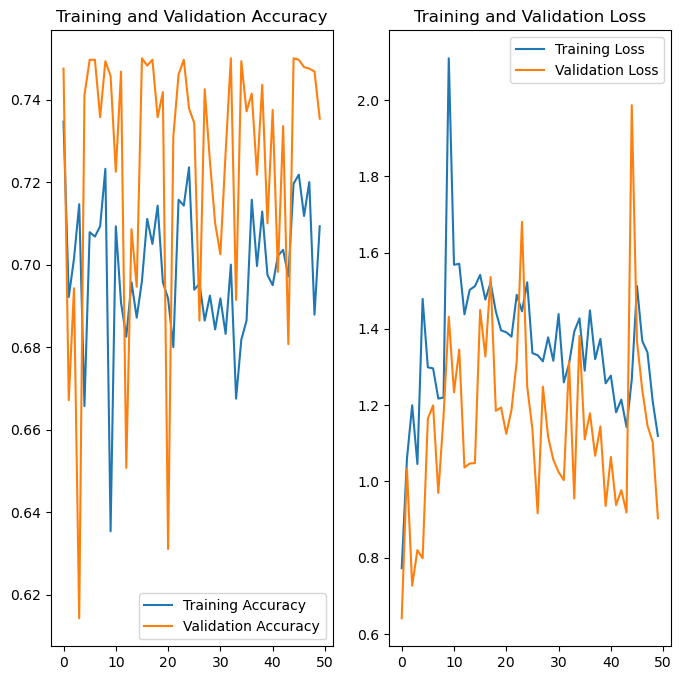

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epoch), accuracy, label='Training Accuracy')
plt.plot(range(epoch), validationAccuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), validationLoss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
model_version=max([int(i) for i in os.listdir("../skinDiseaseDetection/models") + [2]])
model.save(f"../skinDiseaseDetection/models/{model_version}")

INFO:tensorflow:Assets written to: ../skinDiseaseDetection/models/6\assets


INFO:tensorflow:Assets written to: ../skinDiseaseDetection/models/6\assets


In [25]:
model.save("../modelXception.h5")